# E-commerce Order Fulfillment & Delivery Analysis

# import libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import calendar

In [54]:
df= pd.read_csv('ecommerce_orders_dataset (2).csv')

In [55]:
df.head()

,order_id,customer_id,order_date,ship_date,delivery_date,product_id,category,product,quantity,price_per_unit,shipping_cost,delivery_status,region
0,O0001,C385,2023-02-24,2023-02-26,2023-02-28,P1813,Beauty,Moisturizer,4,999.84,14.27,Delivered,North
1,O0002,C953,2023-05-11,2023-05-12,2023-05-15,P9025,Electronics,Phone,1,634.62,12.72,Delivered,North
2,O0003,C403,2023-06-09,2023-06-14,2023-06-21,P6414,Clothing,Jacket,3,898.16,7.72,Delivered,East
3,O0004,C429,2023-06-06,2023-06-09,2023-06-15,P6040,Toys,Board Game,1,296.25,8.41,Delayed,South
4,O0005,C944,2023-07-08,2023-07-11,2023-07-18,P8658,Toys,Puzzle,1,969.27,19.17,Delivered,North


In [56]:
df

,order_id,customer_id,order_date,ship_date,delivery_date,product_id,category,product,quantity,price_per_unit,shipping_cost,delivery_status,region
0,O0001,C385,2023-02-24,2023-02-26,2023-02-28,P1813,Beauty,Moisturizer,4,999.84,14.27,Delivered,North
1,O0002,C953,2023-05-11,2023-05-12,2023-05-15,P9025,Electronics,Phone,1,634.62,12.72,Delivered,North
2,O0003,C403,2023-06-09,2023-06-14,2023-06-21,P6414,Clothing,Jacket,3,898.16,7.72,Delivered,East
3,O0004,C429,2023-06-06,2023-06-09,2023-06-15,P6040,Toys,Board Game,1,296.25,8.41,Delayed,South
4,O0005,C944,2023-07-08,2023-07-11,2023-07-18,P8658,Toys,Puzzle,1,969.27,19.17,Delivered,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,O0496,C106,2023-06-28,2023-06-30,2023-07-03,P5021,Beauty,Lipstick,5,623.81,17.04,Delivered,West
496,O0497,C805,2023-05-18,2023-05-23,2023-05-29,P8510,Beauty,Lipstick,4,535.69,6.34,Delivered,East
497,O0498,C934,2023-06-04,2023-06-06,2023-06-09,P4086,Home,Microwave,4,25.45,11.99,Delivered,West
498,O0499,C263,2023-12-25,2023-12-27,2023-12-31,P2673,Toys,Puzzle,1,73.32,13.39,Delivered,East


In [57]:
df.describe()

,quantity,price_per_unit,shipping_cost
count,500.000000,500.000000,500.000000
mean,3.030000,496.547460,12.352420
std,1.390311,289.345723,4.343954
min,1.000000,10.200000,5.040000
25%,2.000000,251.632500,8.387500
50%,3.000000,491.570000,12.415000
75%,4.000000,745.467500,15.930000
max,5.000000,999.960000,19.960000


In [58]:
df.isnull().sum()

order_id           0
customer_id        0
order_date         0
ship_date          0
delivery_date      0
product_id         0
category           0
product            0
quantity           0
price_per_unit     0
shipping_cost      0
delivery_status    0
region             0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         500 non-null    object 
 1   customer_id      500 non-null    object 
 2   order_date       500 non-null    object 
 3   ship_date        500 non-null    object 
 4   delivery_date    500 non-null    object 
 5   product_id       500 non-null    object 
 6   category         500 non-null    object 
 7   product          500 non-null    object 
 8   quantity         500 non-null    int64  
 9   price_per_unit   500 non-null    float64
 10  shipping_cost    500 non-null    float64
 11  delivery_status  500 non-null    object 
 12  region           500 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 50.9+ KB


# Converting date columns

In [60]:
df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')
df['delivery_date']=pd.to_datetime(df['delivery_date'],errors='coerce')
df['ship_date']=pd.to_datetime(df['ship_date'],errors='coerce')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         500 non-null    object        
 1   customer_id      500 non-null    object        
 2   order_date       500 non-null    datetime64[ns]
 3   ship_date        500 non-null    datetime64[ns]
 4   delivery_date    500 non-null    datetime64[ns]
 5   product_id       500 non-null    object        
 6   category         500 non-null    object        
 7   product          500 non-null    object        
 8   quantity         500 non-null    int64         
 9   price_per_unit   500 non-null    float64       
 10  shipping_cost    500 non-null    float64       
 11  delivery_status  500 non-null    object        
 12  region           500 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(7)
memory usage: 50.9+ KB


# Monthly Orders & Revenue

In [62]:
df['orders_monthly']=df['order_date'].dt.month
df['orders_year']=df['order_date'].dt.year
df['orders_week']=df['order_date'].dt.dayofweek

In [63]:
df.head()

,order_id,customer_id,order_date,ship_date,delivery_date,product_id,category,product,quantity,price_per_unit,shipping_cost,delivery_status,region,orders_monthly,orders_year,orders_week
0,O0001,C385,2023-02-24,2023-02-26,2023-02-28,P1813,Beauty,Moisturizer,4,999.84,14.27,Delivered,North,2,2023,4
1,O0002,C953,2023-05-11,2023-05-12,2023-05-15,P9025,Electronics,Phone,1,634.62,12.72,Delivered,North,5,2023,3
2,O0003,C403,2023-06-09,2023-06-14,2023-06-21,P6414,Clothing,Jacket,3,898.16,7.72,Delivered,East,6,2023,4
3,O0004,C429,2023-06-06,2023-06-09,2023-06-15,P6040,Toys,Board Game,1,296.25,8.41,Delayed,South,6,2023,1
4,O0005,C944,2023-07-08,2023-07-11,2023-07-18,P8658,Toys,Puzzle,1,969.27,19.17,Delivered,North,7,2023,5


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         500 non-null    object        
 1   customer_id      500 non-null    object        
 2   order_date       500 non-null    datetime64[ns]
 3   ship_date        500 non-null    datetime64[ns]
 4   delivery_date    500 non-null    datetime64[ns]
 5   product_id       500 non-null    object        
 6   category         500 non-null    object        
 7   product          500 non-null    object        
 8   quantity         500 non-null    int64         
 9   price_per_unit   500 non-null    float64       
 10  shipping_cost    500 non-null    float64       
 11  delivery_status  500 non-null    object        
 12  region           500 non-null    object        
 13  orders_monthly   500 non-null    int32         
 14  orders_year      500 non-null    int32    

In [65]:
df['revenue']=df['quantity'] * df['price_per_unit']

In [66]:
monthly_states =df.groupby('orders_monthly').agg(
    Total_orders=('order_id', 'count'),
    Total_revenue=('revenue', 'sum')
).reset_index()

In [67]:
monthly_states = monthly_states.sort_values(by='orders_monthly')

In [68]:
monthly_states['month_name'] = monthly_states['orders_monthly'].apply(lambda x:calendar.month_abbr[x])
monthly_states = monthly_states[['orders_monthly','month_name','Total_orders','Total_revenue']]
print(monthly_states)

    orders_monthly month_name  Total_orders  Total_revenue
0                1        Jan            36       61966.76
1                2        Feb            41       52100.34
2                3        Mar            45       64445.35
3                4        Apr            42       48371.06
4                5        May            45       60695.89
5                6        Jun            43       64821.37
6                7        Jul            38       61565.76
7                8        Aug            41       59430.24
8                9        Sep            41       67033.90
9               10        Oct            52       81884.73
10              11        Nov            29       55423.52
11              12        Dec            47       76594.25


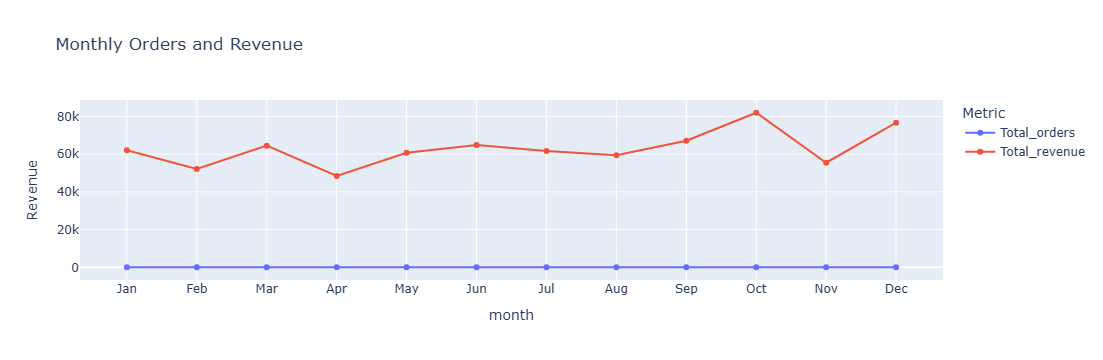

In [69]:
figer = px.line(monthly_states, x='month_name', y=['Total_orders','Total_revenue'],
title = 'Monthly Orders and Revenue',
markers=True,
labels={'value' :'Revenue', 'month_name':'month', 'variable': 'Metric'})
figer.update_traces(mode='lines+markers')
figer.show()


# Shipping & Delivery Time Analysis

In [70]:
vaild = df[df['delivery_status']=='Delivered'].copy()

In [71]:
vaild['shipping_time'] = (vaild['ship_date']-vaild['order_date']).dt.days
vaild['delivery_time']=(vaild['delivery_date']-vaild['ship_date']).dt.days


In [72]:
print(vaild[['shipping_time', 'delivery_time']].mean())

shipping_time    2.944444
delivery_time    4.419192
dtype: float64


In [73]:
df.head()

,order_id,customer_id,order_date,ship_date,delivery_date,product_id,category,product,quantity,price_per_unit,shipping_cost,delivery_status,region,orders_monthly,orders_year,orders_week,revenue
0,O0001,C385,2023-02-24,2023-02-26,2023-02-28,P1813,Beauty,Moisturizer,4,999.84,14.27,Delivered,North,2,2023,4,3999.36
1,O0002,C953,2023-05-11,2023-05-12,2023-05-15,P9025,Electronics,Phone,1,634.62,12.72,Delivered,North,5,2023,3,634.62
2,O0003,C403,2023-06-09,2023-06-14,2023-06-21,P6414,Clothing,Jacket,3,898.16,7.72,Delivered,East,6,2023,4,2694.48
3,O0004,C429,2023-06-06,2023-06-09,2023-06-15,P6040,Toys,Board Game,1,296.25,8.41,Delayed,South,6,2023,1,296.25
4,O0005,C944,2023-07-08,2023-07-11,2023-07-18,P8658,Toys,Puzzle,1,969.27,19.17,Delivered,North,7,2023,5,969.27


# Delivery Orders by Region

In [74]:
delivery_orders=df[df['delivery_status'] == 'Delivered'].groupby('region').size().reset_index(name='delivered_count')

In [75]:
print(delivery_orders)

  region  delivered_count
0   East               93
1  North               98
2  South              105
3   West              100


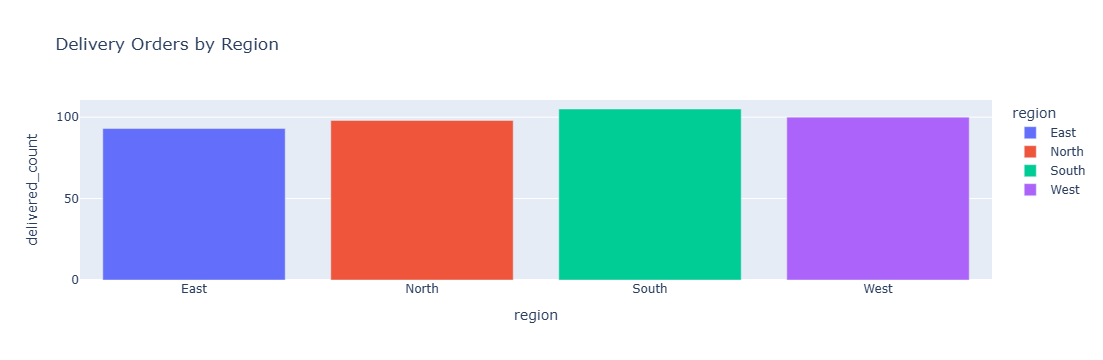

In [91]:
fig = px.bar(delivery_orders,x='region',y='delivered_count', title='Delivery Orders by Region',color='region')
fig.show()

# Top Customers by spend

In [77]:
df['Total_price']=df['quantity'] * df['price_per_unit']
top_customers = df.groupby('customer_id')['Total_price'].sum().nlargest(5).reset_index()

In [78]:
print(top_customers)

  customer_id  Total_price
0        C782     10283.70
1        C790      8514.55
2        C487      8006.21
3        C305      6687.98
4        C241      6671.21


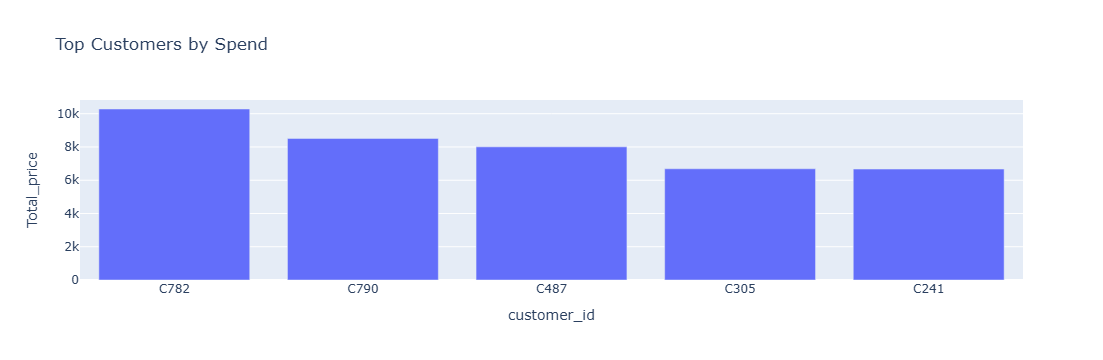

In [89]:
fige = px.bar(top_customers, x='customer_id', y='Total_price',title='Top Customers by Spend')
fige.show()

# Top Products by Revenue

In [79]:
top_products = df.groupby('product')['Total_price'].sum().nlargest(5).reset_index()

In [81]:
print(top_products)

      product  Total_price
0    Lipstick     70664.60
1      Jacket     63712.68
2    Lego Set     62503.98
3      Vacuum     60135.79
4  Headphones     53551.22


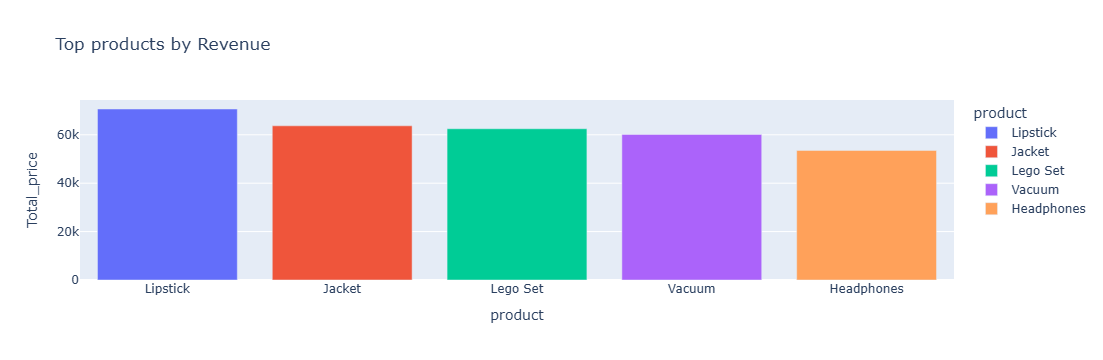

In [83]:
fige = px.bar(top_products, x='product', y='Total_price',title='Top products by Revenue',color='product')
fige.show()